# Info Dataset

Context
The Regulation (EU) No 2019/631 requires Countries to record information for each new passenger car registered in its territory. Every year, each Member State shall submit to the Commission all the information related to their new registrations.

The following details are required for each new passenger car registered: manufacturer name, type approval number, type, variant, version, make and commercial name, specific emissions of CO2 (NEDC and WLTP protocols), masses of the vehicle, wheel base, track width, engine capacity and power, fuel type and mode, eco-innovations and electricity consumption.

Content
+1 million rows and 33 columns.
Abbreviations used in the dataset are listed below.

ID : Identification number

MS : Member state

Mp : Manufacturer pooling

VFN : Vehicle family identification number

Mh : Manufacturer name EU standard denomination

Man : Manufacturer name OEM declaration

MMS : Manufacturer name MS registry denomination

TAN : Type approval number

T : Type

Va : Variant

Ve : Version

Mk : Make

Cn : Commercial name

Ct : Category of the vehicle type approved

Cr : Category of the vehicle registered

m (kg) : Mass in running order complete vehicle

Mt : WLTP test mass

Enedc (g/km) : Specific CO2 Emissions (NEDC)

Ewltp (g/km) : Specific CO2 Emissions (WLTP)

W (mm) : Wheel Base

At1 (mm) : Axle width steering axle

At2 (mm) : Axle width other axle

Ft : Fuel type

Fm : Fuel mode

ec (cm3) : Engine capacity

ep (KW) : Engine power

z (Wh/km) : Electric energy consumption

IT : Innovative technology or group of innovative technologies

Ernedc (g/km) : Emissions reduction through innovative technologies

Erwltp (g/km) : Emissions reduction through innovative technologies (WLTP)

De : Deviation factor

Vf : Verification factor

r : Total new registrations


## Member States 

In [42]:
name = ['Belgium','Greece','Lithuania','Portugal','Bulgaria','Spain','Luuxembourg','Romania','Czechia'
        ,'France','Hungary','Slovenia','Denmark','Croatia','Malta','Slovakia','Germany','Italy'
       ,'Netherlands','Finland','Estonia','Cyprus','Austria','Sweden','Ireland','Latvia','Poland']
state = ['BE','EL','LT','PT','BG','ES','LU','RO','CZ','FR','HU','SI','DK','HR','MT','SK','DE','IT','NL','FI'
        ,'EE','CY','AT','SE','IE','LV','PL']

df = pd.DataFrame(list(zip(name, state)), 
               columns =['Name', 'State']) 
df.sort_values('Name',ascending = True)


,Name,State
22,Austria,AT
0,Belgium,BE
4,Bulgaria,BG
13,Croatia,HR
21,Cyprus,CY
8,Czechia,CZ
12,Denmark,DK
20,Estonia,EE
19,Finland,FI
9,France,FR


## Import pythons packages

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import glob
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline

## Reading all csv files

Note: The warning is just because is too expensive (ram) to determine the type of the column in all the csv files.

In [43]:
path = r'/Users/epanza/Documents/Beuth/SEM_3/URBANTECH/Repo/urbanTech' # use your path
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding='ISO-8859–1')
    li.append(df)

total_df = pd.concat(li, axis=0, ignore_index=True)
print(total_df.head())
print('\n')
print('The total of rows in the dataframe: ' + str(len(total_df.index)))

/Users/epanza/opt/anaconda3/envs/Urban/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.

/Users/epanza/opt/anaconda3/envs/Urban/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (3,27) have mixed types.Specify dtype option on import or set low_memory=False.



        ID  MS           Mp  VFN          Mh            Man            MMS  \
0  1356719  BG  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   
1  1351657  BG  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   
2  1352181  BG  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   
3  1347499  BG  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   
4  1345465  BG  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG  VOLKSWAGEN AG   

                   TAN   T          Va  ... Fm ec (cm3) ep (KW) z (Wh/km)  \
0  E1*2001/116*0211*43  1T      DFGAAC  ...  M   1968.0   110.0       NaN   
1  E1*2001/116*0307*47  3C    AADCXAX0  ...  M   1598.0    88.0       NaN   
2  E1*2001/116*0307*47  3C    ACDFCAX1  ...  M   1968.0   140.0       NaN   
3   E1*2007/46*0623*27  AU  GAC4CHHAX0  ...  M   1984.0   169.0       NaN   
4   E1*2007/46*0539*21  16    ABCYVDX0  ...  M   1197.0    77.0       NaN   

    It  Ernedc (g/km)  Erwltp (g/km)  De  Vf  r  
0  NaN            

## Overview of sells by state

In [44]:
#Take only the state,car and number of sells and groupby
reg_df = total_df[['MS','Mh','r']].groupby(['MS','Mh'])['r'].sum().reset_index()

member_states = reg_df.MS.unique()
list_totals = []

for x in member_states:
        
    df = reg_df[reg_df['MS'] == x]
    total = df['r'].sum()
    list_totals.append(total)
    
    fig = px.line_polar(df, r='r', theta='Mh', line_close=True, color="MS")
    fig.update_traces(fill='toself')
    fig.show()
#I use plotly.express to do the radar chart

## Top 5 sell cars over europe 

In [45]:
#Top 5 sell cars over europe.
numberCars = reg_df.groupby(['Mh'], as_index=False).agg({'r': ['sum', 'min', 'max']})
numberCars.columns = ['Mh','Total', 'min', 'max']
print(numberCars.sort_values('Total', ascending = False).head())

#The top players are: DAIMLER AG - VOLKSWAGEN - AUDI AG - RENAULT - TOYOTA

            Mh   Total  min     max
15  DAIMLER AG  362660  192  298758
69  VOLKSWAGEN  287503   97  112164
4      AUDI AG  273347  309  174118
56     RENAULT  232272   50  103607
66      TOYOTA  212815  854   89177


## Sells For "Daimler AG" over europe

In [46]:
df_most_car = reg_df[reg_df['Mh'] == 'DAIMLER AG'].reset_index(drop=True)
df_most_car = df_most_car.sort_values('r', ascending = False)
df_most_car

,MS,Mh,r
1,DE,DAIMLER AG,298758
4,FR,DAIMLER AG,22599
8,NL,DAIMLER AG,15934
5,IT,DAIMLER AG,14121
7,LU,DAIMLER AG,3717
3,ES,DAIMLER AG,3631
9,PT,DAIMLER AG,1860
10,SI,DAIMLER AG,804
0,BG,DAIMLER AG,617
6,LT,DAIMLER AG,427


In [47]:
names = ['Germany','France','Netherlands','Italy','Luxembourg','Spain','Portugal','Slovenia'
         ,'Bulgaria','Lithuania','Estonia']
alpha = ['DEU','FRA','NLD','ITA','LUX','ESP','PRT','SVN','BGR','LTU','EST']
df_most_car['Country'] = names
df_most_car['iso_alpha'] = alpha
#print(df_most_car)
fig = px.scatter_geo(df_most_car, locations="iso_alpha", color="Country",
                     hover_name="MS", size="r",
                     projection="natural earth")
fig.show()

## Top 5 most toxic cars

In [78]:
Most_toxic = total_df[['MS','Mh','Enedc (g/km)']].groupby(['Mh'], as_index=False).agg({'Enedc (g/km)': ['min', 'max']})
Most_toxic.columns = ['Mh','min', 'max']
Most_toxic = Most_toxic.reset_index(drop=True)
Most_toxic_df = Most_toxic[['Mh','max']].sort_values(by='max', ascending=False).head()
Most_toxic_df = Most_toxic_df.rename(columns={'Mh': 'CarBrand', 'max': 'Enedc (g/km)'})

print('The most toxic cars: \n')
print(Most_toxic_df)
print('\n')

The most toxic cars: 

      CarBrand  Enedc (g/km)
12     BUGATTI         539.0
68     UNKNWON         472.0
18     FERRARI         420.0
0       AA-IVA         413.0
15  DAIMLER AG         397.0




## The Co2 generated by the most toxic car

In [79]:
df1 = numberCars[numberCars['Mh'] == 'BUGATTI']
df2 = numberCars[numberCars['Mh'] == 'UNKNWON']
df3 = numberCars[numberCars['Mh'] == 'FERRARI']
df4 = numberCars[numberCars['Mh'] == 'AA-IVA']
df5 = numberCars[numberCars['Mh'] == 'DAIMLER AG']

Top_most_toxic_df = pd.concat([df1,df2,df3,df4,df5])
toxic_df = pd.concat([Most_toxic_df, Top_most_toxic_df], axis=1, join="inner")
toxic_df = toxic_df[['CarBrand','Total','Enedc (g/km)']]
toxic_df['Co2'] = toxic_df['Total'] * toxic_df['Enedc (g/km)'] 
toxic_df = toxic_df.sort_values('Co2',ascending = False).reset_index(drop=True)
toxic_df

,CarBrand,Total,Enedc (g/km),Co2
0,DAIMLER AG,362660,397.0,143976020.0
1,AA-IVA,5644,413.0,2330972.0
2,FERRARI,246,420.0,103320.0
3,BUGATTI,13,539.0,7007.0
4,UNKNWON,1,472.0,472.0


In [ ]:
print('The number of cars by the most toxic one:\n' )
print(Most_toxic_df.sort_values('Total',ascending=False))

print('\n')
print('The most sold car out of the top 5 most toxic is DAIMLER AG with a total of Enedc(g/km): ', 37672 * 397)
#14955,784 kg

## Total Co2 by the top 5 selling cars

           Mh   Total    Co2    Co2_Total
2  DAIMLER AG  362660  397.0  143976020.0
3     AUDI AG  273347  324.0   88564428.0
1  VOLKSWAGEN  287503  244.0   70150732.0
0      TOYOTA  212815  308.0   65547020.0
4     RENAULT  232272  199.0   46222128.0


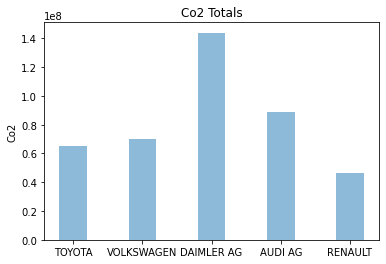

In [88]:
cars = ['TOYOTA','VOLKSWAGEN','DAIMLER AG','AUDI AG','RENAULT']
li = []

for car in cars:
    df = numberCars[numberCars['Mh'] == car]
    li.append(df)

total_selling_car = pd.concat(li, axis=0, ignore_index=True)

lis = []

for car in cars:
    df = Most_toxic[Most_toxic['Mh'] == car]
    lis.append(df)

total_Co2 = pd.concat(lis, axis=0, ignore_index=True)

values = total_Co2['max'].tolist()


total_selling_car['Co2'] = values 

total_selling_car['Co2_Total'] = total_selling_car['Total'] * total_selling_car['Co2']


print(total_selling_car[['Mh','Total','Co2','Co2_Total']].sort_values('Co2_Total',ascending=False))

objects = total_selling_car['Mh']
y_pos = np.arange(len(objects))*2
performance = total_selling_car['Co2_Total']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Co2')
plt.title('Co2 Totals')

plt.show()

# Predict the consumption of Co2

## SGDRegressor

Note: Here i transformed the categorical values into numerical then i scale them, and use the SGDRegressor. (SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).)

In [93]:
sdf = total_df[['m (kg)','W (mm)','At1 (mm)','At2 (mm)','Ft','Fm','ec (cm3)','ep (KW)','Enedc (g/km)']]
sdf = sdf.dropna()
sdf['Ft'] = sdf.Ft.str.replace(' ', '')
sdf['Ft'] = sdf['Ft'].str.upper()
sdf = pd.concat([sdf.drop('Ft', axis=1), pd.get_dummies(sdf['Ft'])], axis=1)
sdf = pd.concat([sdf.drop('Fm', axis=1), pd.get_dummies(sdf['Fm'])], axis=1)
col_name="Enedc (g/km)"
col = sdf.pop(col_name)
sdf.insert(16, col_name, col)
sdf.head()

,m (kg),W (mm),At1 (mm),At2 (mm),ec (cm3),ep (KW),DIESEL,DIESEL/ELECTRIC,E85,LPG,NG-BIOMETHANE,PETROL,PETROL/ELECTRIC,B,F,M,Enedc (g/km)
0,1552.0,2786.0,1561.0,1534.0,1968.0,110.0,1,0,0,0,0,0,0,0,0,1,119.0
1,1444.0,2786.0,1578.0,1562.0,1598.0,88.0,1,0,0,0,0,0,0,0,0,1,105.0
2,1614.0,2786.0,1578.0,1562.0,1968.0,140.0,1,0,0,0,0,0,0,0,0,1,135.0
3,1386.0,2626.0,1533.0,1503.0,1984.0,169.0,0,0,0,0,0,1,0,0,0,1,148.0
4,1340.0,2540.0,1571.0,1543.0,1197.0,77.0,0,0,0,0,0,1,0,0,0,1,121.0


In [94]:
X = scale(sdf.iloc[:, :-1])
y = scale(sdf.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2'))
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))


MSE train: 0.334, test: 0.337


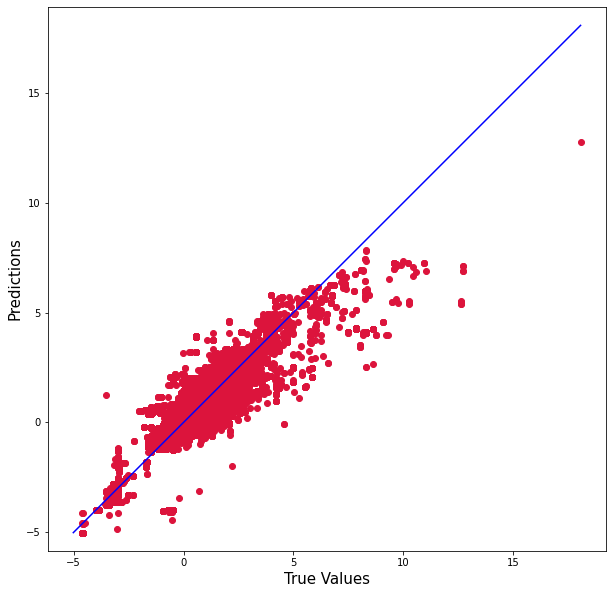

      Actual  Predicted
0   0.818730   0.707723
1  -0.757187  -0.481955
2   0.008258  -0.326945
3   1.268992   0.210235
4   0.008258   0.231380
5   0.008258  -0.596557
6   1.539149   0.965541
7   1.223966   1.089711
8   1.043861   0.264431
9  -0.351951  -0.303604
10 -0.081794  -0.423982
11  0.008258  -0.475775
12  0.638625   0.319826
13  0.233389   0.306167
14 -0.126820  -0.136141
15  0.998835   1.088346
16  0.458520   0.181124
17  0.773704   0.520898
18  0.638625   0.604145
19 -0.667135  -0.824853


In [101]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(pred_df.head(n=20))

## RandomForestRegressor

In [106]:
#RandomeForestReg compare
## SGDRegressor
X = scale(sdf.iloc[:, :-1])
y = scale(sdf.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train);

In [111]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('MSE Test:', round(np.mean(errors), 2))

MSE Test: 0.03


In [113]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.08 %.


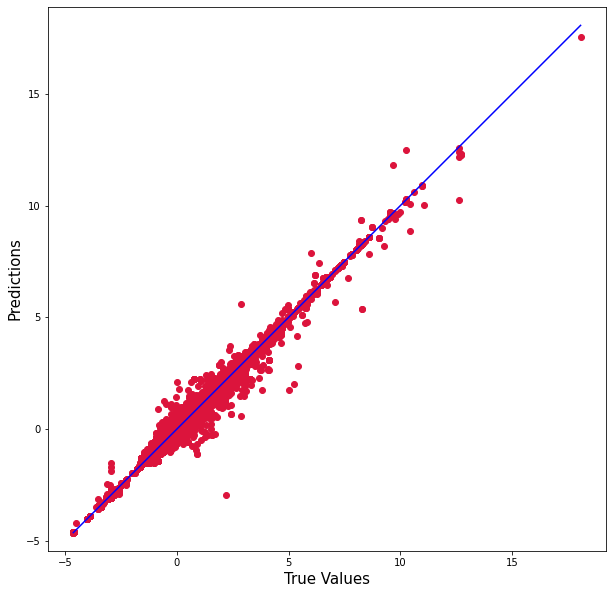

      Actual  Predicted
0   0.818730   0.818730
1  -0.757187  -0.675318
2   0.008258   0.008258
3   1.268992   1.268992
4   0.008258   0.008258
5   0.008258   0.008258
6   1.539149   1.539149
7   1.223966   1.202666
8   1.043861   1.043861
9  -0.351951  -0.282663
10 -0.081794  -0.085172
11  0.008258   0.008258
12  0.638625   0.638625
13  0.233389   0.263298
14 -0.126820  -0.126820
15  0.998835   1.030538
16  0.458520   0.428139
17  0.773704   0.701175
18  0.638625   0.604526
19 -0.667135  -0.667135


In [112]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(pred_df.head(n=20))